# Azure에서 cv 리소스를 받아와 실행한다.

Computer Vision Object Dectection
Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.

네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [20]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [21]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [22]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [23]:
subscription_key = 'e0d72d69f6874007b9dce715dcdcc11c'
vision_base_url = 'https://labuser8computervision.cognitiveservices.azure.com/vision/v2.0/'


In [24]:
analyze_url = vision_base_url + 'analyze'

분석에 사용되는 이미지를 확인합니다.

In [25]:
image_url ='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSALYKdYuP8o2Cio8odyEFiux-VBvPWEDV7hw&usqp=CAU'

In [26]:
con = requests.get(image_url).content
byte = BytesIO(con)
image = Image.open(byte)

# image = Image.open(BytesIO(requests.get(image_url).content))

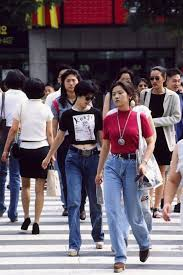

In [27]:
image

In [28]:
headers = {'Ocp-Apim-Subscription-key' : subscription_key}
params = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [29]:
# 웹에서 호출하는 방식은 post와 get이 있다.
response = requests.post(analyze_url, headers = headers, params=params, json=data)

In [30]:
result = response.json()

In [31]:
result

{'categories': [{'name': 'people_', 'score': 0.31640625},
  {'name': 'people_group', 'score': 0.6015625}],
 'color': {'dominantColorForeground': 'Black',
  'dominantColorBackground': 'Black',
  'dominantColors': ['Black', 'White'],
  'accentColor': '731E2E',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['person',
   'road',
   'outdoor',
   'building',
   'street',
   'walking',
   'crossing',
   'cross',
   'people',
   'man',
   'group',
   'child',
   'young',
   'city',
   'holding',
   'riding',
   'boy',
   'woman',
   'girl',
   'game',
   'standing',
   'court',
   'traffic',
   'crowd'],
  'captions': [{'text': 'a group of people walking down a street',
    'confidence': 0.9622389242865713}]},
 'requestId': '0249f1d7-8df0-48ee-b25d-32d8ce4b2c68',
 'metadata': {'height': 275, 'width': 183, 'format': 'Jpeg'}}

In [32]:
image_caption = result['description']['captions'][0]['text']

In [33]:
image_caption

'a group of people walking down a street'

# Object Detection

In [34]:
object_detection_url = vision_base_url + 'detect'

In [35]:
image_url = 'https://hafkztnqhdwa5736843.cdn.ntruss.com/data2/content/image/2021/01/11/.cache/512/20210111259912.png'

In [37]:
image = Image.open(BytesIO(requests.get(image_url).content))

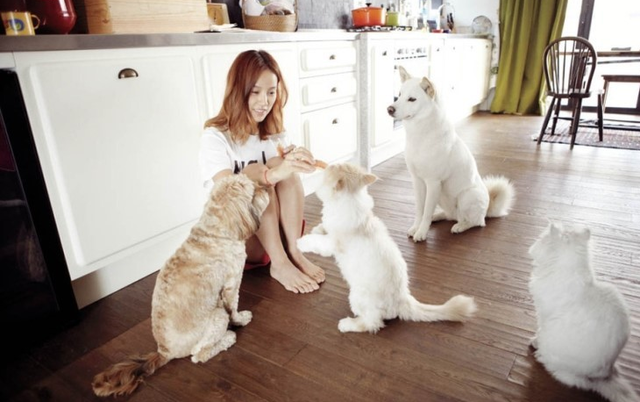

In [38]:
image

In [39]:
headers = {'Ocp-Apim-Subscription-key' : subscription_key}
params = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [40]:
response = requests.post(object_detection_url, headers=headers, params=params, json=data)

In [41]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 535, 'y': 38, 'w': 73, 'h': 107},
   'object': 'chair',
   'confidence': 0.67,
   'parent': {'object': 'seating', 'confidence': 0.672}},
  {'rectangle': {'x': 201, 'y': 54, 'w': 136, 'h': 238},
   'object': 'person',
   'confidence': 0.572},
  {'rectangle': {'x': 383, 'y': 73, 'w': 125, 'h': 167},
   'object': 'dog',
   'confidence': 0.802,
   'parent': {'object': 'mammal',
    'confidence': 0.866,
    'parent': {'object': 'animal', 'confidence': 0.866}}},
  {'rectangle': {'x': 301, 'y': 157, 'w': 185, 'h': 183},
   'object': 'dog',
   'confidence': 0.713,
   'parent': {'object': 'mammal',
    'confidence': 0.866,
    'parent': {'object': 'animal', 'confidence': 0.866}}},
  {'rectangle': {'x': 129, 'y': 160, 'w': 150, 'h': 218},
   'object': 'dog',
   'confidence': 0.56,
   'parent': {'object': 'mammal',
    'confidence': 0.782,
    'parent': {'object': 'animal', 'confidence': 0.783}}},
  {'rectangle': {'x': 530, 'y': 221, 'w': 106, 'h': 178},
   'objec

In [48]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

In [55]:
# boundingBox를 위한 함수
def BoxDraw(detectData):
    objects = detectData['objects']

    for obj in objects:
        # print(obj)

        rect = obj['rectangle']
        print(rect)

        x = rect['x']
        y = rect['y']
        w = rect['w']
        h = rect['h']

        draw.rectangle(((x,y),(x+w,y+h)),outline='red')

        objectName = obj['object']
        draw.text((x,y), objectName, fill='red')

In [56]:
BoxDraw(result)

{'x': 535, 'y': 38, 'w': 73, 'h': 107}
{'x': 201, 'y': 54, 'w': 136, 'h': 238}
{'x': 383, 'y': 73, 'w': 125, 'h': 167}
{'x': 301, 'y': 157, 'w': 185, 'h': 183}
{'x': 129, 'y': 160, 'w': 150, 'h': 218}
{'x': 530, 'y': 221, 'w': 106, 'h': 178}


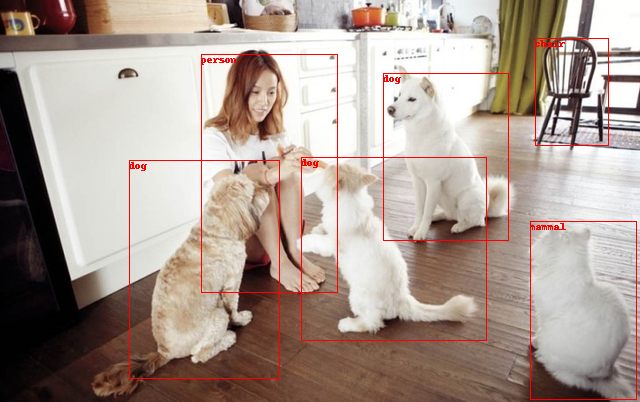

In [57]:
image